In [71]:
# Import libraries and dependencies 

import os
import requests
import pandas as pd
from pathlib import Path
import alpaca_trade_api as tradeapi
import hvplot.pandas 
import math
from MCForecastTools import MCSimulation

%matplotlib inline

In [72]:

from dotenv import load_dotenv
load_dotenv()

True

In [73]:
# Set alpaca API keys and create Alpaca API object 

alpaca_api_key = os.getenv('alpaca_api_key')
alpaca_secret_key = os.getenv('alpaca_secret_key')

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)

In [74]:
# Set ticker
ticker = ['SPY']

# Set timeframe 
timeframe = '1Day'

# Start date
start_date = pd.Timestamp('2021-01-01', tz='America/New_York').isoformat()
# End date
end_date = pd.Timestamp('2022-09-02', tz='America/New_York').isoformat()

# Get historcal stock date fr 2021 to present
df_spy = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

In [75]:
# Drop extra columns

df_spy.drop(columns=['open', 'high', 'low', 'volume', 'trade_count', 'vwap', 'symbol'], inplace=True)


In [76]:
# Change columns name 

df_spy.columns = ['SPY']


In [77]:
# Drop time component 

df_spy.index = df_spy.index.date

In [78]:
# Plot out the Daily Chart of the SPY with 100 Day SMA 

SMA100 = df_spy.rolling(window=100).mean().hvplot()

spy_chart = df_spy.hvplot(
    xlabel='Date', 
    ylabel='Price', 
    title='SPY Daily Chart with SMA100', 
    rot=90
)


spy_chart * SMA100



:Overlay
   .Curve.I  :Curve   [index]   (SPY)
   .Curve.II :Curve   [index]   (SPY)

In [79]:
spy_daily_returns = df_spy.pct_change()
spy_daily_returns.head()

,SPY
2021-01-04,NaN
2021-01-05,0.006887
2021-01-06,0.005979
2021-01-07,0.014857
2021-01-08,0.005698


In [80]:
# Drop all null values
spy_daily_returns.dropna()

,SPY
2021-01-05,0.006887
2021-01-06,0.005979
2021-01-07,0.014857
2021-01-08,0.005698
2021-01-11,-0.006741
...,...
2022-08-29,-0.006612
2022-08-30,-0.010978
2022-08-31,-0.007609
2022-09-01,0.003138


In [81]:
# Drop all null values
spy_daily_returns.dropna()

,SPY
2021-01-05,0.006887
2021-01-06,0.005979
2021-01-07,0.014857
2021-01-08,0.005698
2021-01-11,-0.006741
...,...
2022-08-29,-0.006612
2022-08-30,-0.010978
2022-08-31,-0.007609
2022-09-01,0.003138


In [82]:
# Plot out daily returns of the SPY

spy_daily_returns_plot = spy_daily_returns.hvplot.scatter(
    xlabel='Date', 
    ylabel='Price', 
    title='SPY Daily Returns 2021-Present', 
    rot=90,
    figsize=(20,10),
    color="green"
)

spy_daily_returns_plot

:Scatter   [index]   (SPY)

In [83]:
high = df_spy.loc[:,'SPY'].max()
low = df_spy.loc[:,'SPY'].min()

percent_drop = str(round(((high-low)/high)*100, 2))
print(f"The percentage drop from the high of ${high} from the 2020-2021 bullrun dropped {percent_drop}% to a low of ${low}, and has not fully recovered.")



The percentage drop from the high of $477.71 from the 2020-2021 bullrun dropped 23.41% to a low of $365.86, and has not fully recovered.


In [84]:
spy_std = df_spy.rolling(window=50).std().hvplot(
    xlabel='Date', 
    ylabel='SD', 
    rot=90, 
    title="Standard Deviation 100 Day Rolling Period")

spy_std

:Curve   [index]   (SPY)

In [85]:
# Read in different sector data

combined_df = pd.read_csv(Path("./Resources/Combined_Sectors_df.csv"))
combined_df = combined_df.set_index('Date')
combined_df.head()

,Communcication_Services,Consumer_Discretionary,Consumer_Staples,Energy,Financials,Health_Care,Information_Technology,Materials,Real_Estate,Utilities
Date,,,,,,,,,,
2009-01-02,114.93,177.33,177.33,403.12,171.36,316.22,241.74,142.94,76.03,151.29
2009-01-05,110.44,177.37,177.37,408.61,167.15,313.30,241.94,142.93,74.25,152.38
2009-01-06,109.96,180.56,180.56,410.65,170.39,308.76,249.27,145.61,78.55,151.16
2009-01-07,107.27,174.21,174.21,394.86,161.64,305.79,240.10,143.24,75.13,148.64
2009-01-08,108.33,174.78,174.78,399.44,161.31,307.48,242.18,144.43,74.48,149.20


In [86]:
combined_present = combined_df.loc['2021-01-01':'2022-08-01']
combined_daily_returns = combined_present.pct_change()


cumulative_returns = (1 + combined_daily_returns).cumprod() -1
cumulative_returns

,Communcication_Services,Consumer_Discretionary,Consumer_Staples,Energy,Financials,Health_Care,Information_Technology,Materials,Real_Estate,Utilities
Date,,,,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.002699,0.008386,0.008386,0.045340,0.003721,0.006667,0.007004,0.023013,-0.000817,0.000322
2021-01-06,-0.003934,0.013480,0.013480,0.076614,0.047499,0.020852,-0.011177,0.064806,-0.006261,0.024939
2021-01-07,0.010019,0.031696,0.031696,0.092705,0.062898,0.034323,0.015021,0.073164,-0.003221,0.011295
2021-01-08,0.012535,0.050223,0.050223,0.091728,0.060852,0.039221,0.022665,0.067710,0.007623,0.020080
...,...,...,...,...,...,...,...,...,...,...
2022-07-26,-0.160445,-0.096098,-0.096098,0.947714,0.116453,0.161076,0.043588,0.044187,0.203902,0.156713
2022-07-27,-0.117531,-0.061296,-0.061296,0.990646,0.133650,0.168594,0.088402,0.057268,0.210481,0.157968
2022-07-28,-0.124028,-0.045642,-0.045642,0.999581,0.141567,0.174980,0.103997,0.075093,0.255263,0.198835


In [87]:
cumulative_returns = pd.DataFrame(cumulative_returns)
cumulative_returns.dropna()

cumulative_returns.hvplot(title="SP500 Sector Performance 2021-Present", xlabel="2021-Present")

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [88]:

for item in combined_present:
    first = combined_present.loc[:, item][0]
    last = combined_present.loc[:, item][-1]
    percent_change = round(((last-first)/first)*100, 2)
    print(f"{item} percent change is {percent_change}")
    
    




Communcication_Services percent change is -12.28
Consumer_Discretionary percent change is 0.02
Consumer_Staples percent change is 0.02
Energy percent change is 104.42
Financials percent change is 14.73
Health_Care percent change is 16.23
Information_Technology percent change is 11.88
Materials percent change is 8.04
Real_Estate percent change is 24.78
Utilities percent change is 21.0


In [89]:
# Set ticker
ticker = ['SPXE']

# Set timeframe 
timeframe = '1Day'

# Start date
start_date = pd.Timestamp('2021-01-01', tz='America/New_York').isoformat()
# End date
end_date = pd.Timestamp('2022-09-02', tz='America/New_York').isoformat()

# Get historcal stock date fr 2021 to present
df_spxe = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

In [90]:
gdp = pd.read_csv(Path("./Resources/GDP2.csv"))
gdp.head()

,Unnamed: 0,Quarter,Percent Change
0,NaN,2018 Q3,1.9
1,NaN,2018 Q4,0.9
2,NaN,2019 Q1,2.4
3,NaN,2019 Q2,3.2
4,NaN,2019 Q3,2.8


In [91]:
gdp.drop(columns=["Unnamed: 0"], inplace=True)
#gdp = gdp.set_index(["Quarter"], inplace=True)
gdp

,Quarter,Percent Change
0,2018 Q3,1.9
1,2018 Q4,0.9
2,2019 Q1,2.4
3,2019 Q2,3.2
4,2019 Q3,2.8
5,2019 Q4,1.9
6,2020 Q1,-5.1
7,2020 Q2,-31.2
8,2020 Q3,33.8
9,2020 Q4,4.5


In [92]:
gdp = gdp.set_index("Quarter")

In [93]:
gdp.hvplot.bar(rot=90, label='GDP', color='green', hover_color='purple')

:Bars   [Quarter]   (Percent Change)

In [94]:
unrate = pd.read_csv(Path("./Resources/Unrate (1).csv"))
unrate.head()

,DATE,UNRATE
0,1948-01-01,3.750000
1,1949-01-01,6.050000
2,1950-01-01,5.208333
3,1951-01-01,3.283333
4,1952-01-01,3.025000


In [95]:
unrate.columns = ["Date", "Unrate"]

In [96]:
unrate = unrate.set_index("Date")

In [97]:
unrate = unrate.loc["2000-01-01":"2022-01-01"]

In [98]:
unrate.head()

,Unrate
Date,
2000-01-01,3.966667
2001-01-01,4.741667
2002-01-01,5.783333
2003-01-01,5.991667
2004-01-01,5.541667


In [99]:
unrate_bar = unrate.hvplot.bar(stacked=True, rot=90, width=800, legend='top_left', color="yellow", title = "Unemployment Rate Since 2000")
unrate_line = unrate.hvplot(stacked=True, rot=90, width=800, legend='top_left', color="red")
unrate_bar * unrate_line

:Overlay
   .Bars.I  :Bars   [Date]   (Unrate)
   .Curve.I :Curve   [Date]   (Unrate)

In [100]:
inflation = pd.read_csv(Path("./Resources/inflation.csv"))

In [101]:
inflation.columns = ["Date", "Inflation Rate"]

In [102]:
inflation = inflation.set_index("Date")

In [103]:
inflation = inflation.loc["2000-01-01":"2021-01-01"]

In [104]:
inf_scatter = inflation.hvplot.scatter(rot=90, title="Inflation Rate Since 2000")
inf_line = inflation.hvplot(rot=90, color="red")
inflation_chart = inf_scatter * inf_line
inflation_chart

:Overlay
   .Scatter.I :Scatter   [Date]   (Inflation Rate)
   .Curve.I   :Curve   [Date]   (Inflation Rate)

In [105]:
fedfund = pd.read_csv(Path("./Resources/FEDFUNDS.csv"))

In [106]:
fedfund.columns = ["Date", "FedFund Rate"]

In [107]:
fedfund = fedfund.set_index("Date")

In [108]:
fedfund = fedfund.loc["1980-01-01":"2022-01-01"]

In [109]:

fed_chart =fedfund.hvplot.bar(stacked=True, rot=90, width=800, legend='top_left', color="purple", title="Fed Fund Rate")


In [110]:
# Set ticker
ticker = ['SPXE']

# Set timeframe 
timeframe = '1Day'

# Start date
start_date = pd.Timestamp('2021-01-01', tz='America/New_York').isoformat()
# End date
end_date = pd.Timestamp('2022-09-02', tz='America/New_York').isoformat()

# Get historcal stock date fr 2021 to present
df_spxe = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

In [111]:
df_spxe.drop(columns=['open', 'high', 'low', 'volume', 'trade_count', 'vwap', 'symbol'], inplace=True)
df_spxe.columns = ['SPXE Energy']


In [112]:
df_spxe.index = df_spxe.index.date

In [113]:
# Set ticker
ticker = ['XLRE']

# Set timeframe 
timeframe = '1Day'

# Start date
start_date = pd.Timestamp('2021-01-01', tz='America/New_York').isoformat()
# End date
end_date = pd.Timestamp('2022-09-02', tz='America/New_York').isoformat()

# Get historcal stock date fr 2021 to present
df_xlre = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

In [114]:
df_xlre.drop(columns=['open', 'high', 'low', 'volume', 'trade_count', 'vwap', 'symbol'], inplace=True)
df_xlre.columns = ['XLRE Real Estate']

In [115]:
df_xlre.index = df_xlre.index.date

In [116]:
# Set ticker
ticker = ['XLV']

# Set timeframe 
timeframe = '1Day'

# Start date
start_date = pd.Timestamp('2021-01-01', tz='America/New_York').isoformat()
# End date
end_date = pd.Timestamp('2022-09-02', tz='America/New_York').isoformat()

# Get historcal stock date fr 2021 to present
df_xlv = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

In [117]:
df_xlv.drop(columns=['open', 'high', 'low', 'volume', 'trade_count', 'vwap', 'symbol'], inplace=True)
df_xlv.columns = ['XLV Health Care']

In [118]:
df_xlv.index = df_xlv.index.date

In [119]:
# Set ticker
ticker = ['XLU']

# Set timeframe 
timeframe = '1Day'

# Start date
start_date = pd.Timestamp('2021-01-01', tz='America/New_York').isoformat()
# End date
end_date = pd.Timestamp('2022-09-02', tz='America/New_York').isoformat()

# Get historcal stock date fr 2021 to present
df_xlu = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

In [120]:
df_xlu.drop(columns=['open', 'high', 'low', 'volume', 'trade_count', 'vwap', 'symbol'], inplace=True)
df_xlu.columns = ['XLU Utilities']

In [121]:
df_xlu.index = df_xlu.index.date

In [122]:
optimal_portfolio = pd.concat([df_xlu, df_xlv, df_xlre, df_spxe], axis='columns', join='inner')
optimal_daily_return = optimal_portfolio.pct_change()
optimal_daily_return.dropna(inplace=True)
weights = [1/4, 1/4, 1/4, 1/4]
optimal_daily_return = optimal_daily_return.dot(weights)
cumulative_optimal = (1 + optimal_daily_return).cumprod() -1
cumulative_optimal = pd.DataFrame(cumulative_optimal)
cumulative_optimal.columns = ["Top Performing Sectors"]
cumulative_optimal_plot = cumulative_optimal.hvplot(
    xlabel='Date', 
    ylabel='Price', 
    title='SPY Daily Chart compared to Optimal Portfolio', 
    rot=90
)

In [123]:

cumulative_spy = (1 + spy_daily_returns).cumprod() -1
cumulative_spy = pd.DataFrame(cumulative_spy)
cumulative_spy.columns = ["SPY"]
cumulative_spy_plot = cumulative_spy.hvplot(
    xlabel='Date', 
    ylabel='Price',  
    rot=90
)
    

In [124]:
comparison_plot = pd.concat([cumulative_optimal, cumulative_spy], axis='columns', join='inner')

In [125]:
comparison_plot.hvplot.area(
    xlabel='Date', 
    ylabel='Cumulative Returns', 
    title='SPY Daily Chart compared to Top Sectors', 
    rot=90
)
    

:NdOverlay   [Variable]
   :Area   [index]   (value,Baseline)

In [126]:
# Set ticker
ticker = ['SPXE', 'XLRE', 'XLV', 'XLU']

# Set timeframe 
timeframe = '1Day'

# Start date
start_date = pd.Timestamp('2021-01-01', tz='America/New_York').isoformat()
# End date
end_date = pd.Timestamp('2022-09-02', tz='America/New_York').isoformat()

# Get historcal stock date fr 2021 to present
df_tickers = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

In [127]:
SPXE = df_tickers[df_tickers['symbol']=='SPXE'].drop('symbol', axis=1)
XLRE = df_tickers[df_tickers['symbol']=='XLRE'].drop('symbol', axis=1)
XLV = df_tickers[df_tickers['symbol']=='XLV'].drop('symbol', axis=1)
XLU = df_tickers[df_tickers['symbol']=='XLU'].drop('symbol', axis=1)

df_tickers = pd.concat([SPXE, XLRE, XLV, XLU], axis=1, keys=["SPXE", "XLRE", "XLV", "XLU"])

In [128]:
MC_fiveyear = MCSimulation(
    portfolio_data = df_tickers,
    weights = [.25, .25, .25, .25],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [129]:
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/andremontgomery/Desktop/Project1/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005306,0.996479,0.999691,1.004568,1.007374,0.995820,0.991470,1.004419,1.001695,1.009142,...,1.002803,1.001882,1.001841,0.997506,1.002870,0.995732,1.000203,1.001111,1.000480,0.997629
2,1.009993,0.986192,1.003143,1.008773,1.005857,0.987250,0.993051,1.003200,0.999150,1.017734,...,1.000500,1.000290,0.998748,0.995613,0.999740,0.999743,0.988055,0.995956,1.004188,0.997217
3,1.010316,0.983020,1.001664,1.014062,1.011219,0.989492,0.991027,1.009277,1.001159,1.023587,...,0.995840,1.007514,0.999720,0.986845,0.993348,0.998385,0.990603,0.994151,1.006454,0.995909
4,1.012979,0.981443,0.999643,1.014711,1.022597,0.987044,0.987308,1.004964,0.995328,1.021867,...,0.984082,1.007128,1.003826,0.981184,0.997656,1.003724,0.990770,0.998263,1.005473,0.996409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.610355,1.658380,1.267680,1.429546,1.984696,1.343500,1.251022,2.028740,1.634688,1.321400,...,1.957373,1.962321,1.318620,1.532129,2.062291,1.800531,1.100194,1.509417,1.035320,1.754889
1257,1.613462,1.645350,1.276209,1.426333,1.983548,1.341580,1.252328,2.033064,1.642556,1.323818,...,1.952670,1.965907,1.324172,1.519962,2.036798,1.797922,1.094595,1.516687,1.029218,1.745440
1258,1.622276,1.647932,1.276897,1.431636,1.972358,1.327730,1.255854,2.017455,1.651056,1.326652,...,1.941226,1.969209,1.321492,1.515076,2.030786,1.779178,1.098229,1.519972,1.034850,1.741836
1259,1.623366,1.632063,1.275345,1.430437,1.978595,1.317304,1.253371,2.023292,1.645199,1.329685,...,1.943544,1.990697,1.322447,1.518558,2.029389,1.801498,1.095456,1.523516,1.038246,1.751750


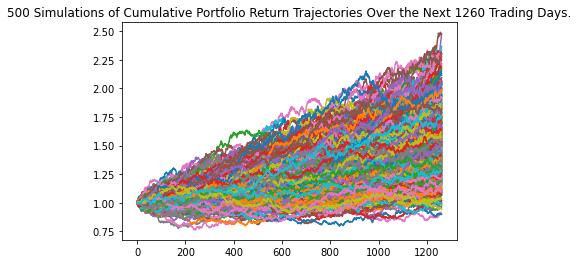

In [130]:
line_plot = MC_fiveyear.plot_simulation()



In [131]:
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.541644
std               0.304819
min               0.899643
25%               1.309446
50%               1.512219
75%               1.746114
max               2.475521
95% CI Lower      1.052923
95% CI Upper      2.211788
Name: 1260, dtype: float64


In [132]:
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $10529.23 and $22117.88


In [133]:
#Inflation for Dotcom Bubble Period 

inflation_200 = pd.read_csv(Path("./Resources/inflation_2000.csv"))
inflation_200.columns = ["Date", "Percent Change"]
inflation_200 = inflation_200.set_index("Date")
inflation_200 = inflation_200.loc["1999-05-01":"2002-11-01"]
inflation_200.head()

,Percent Change
Date,
1999-05-01,2.162527
1999-06-01,2.081255
1999-07-01,2.124453
1999-08-01,2.107414
1999-09-01,2.083292


In [134]:
inflation_200.hvplot(rot=90, label='Inflation Dotcom Bubble Leading up to October 4th 2002', color='green', hover_color='purple')

:Curve   [Date]   (Percent Change)

In [135]:
# SPY for dotcom bubble period 

spy_200 = pd.read_csv(Path("./Resources/SPY.csv"))
spy_200 = spy_200.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
spy_200 = spy_200.set_index("Date")
spy_200 = spy_200.loc["1999-05-01": "2002-11-01"]

In [136]:
spy_200.head()

,Close
Date,
1999-05-01,130.203125
1999-06-01,137.000000
1999-07-01,132.750000
1999-08-01,132.062500
1999-09-01,128.750000


In [137]:
spy_200.hvplot(rot=90, title="SPY Price Decline 1991-2002")

:Curve   [Date]   (Close)

In [138]:
#Unemployment for dotcom bubble period.

unrate_200 = pd.read_csv(Path("./Resources/UNRATE (1).csv"))
unrate_200.columns = ["Date", "Unemployment Rate"]
unrate_200 = unrate_200.set_index("Date")
unrate_200 = unrate_200.loc["1997-01-01":"2003-01-01"]
unrate_200.hvplot.bar(rot=90, title="Unemployment Rate 1997-2003", color = "purple")

:Bars   [Date]   (Unemployment Rate)

In [142]:
#GDP for unemployment period 

GDP_2000 = pd.read_csv(Path("./Resources/GDP_2000.csv"))

In [143]:
GDP_2000.columns = ["Date", "Percent Change"]
GDP_2000 = GDP_2000.set_index("Date")
GDP_2000.hvplot(rot=90, title="GDP Percent Change 1996-2003", color = "purple")

:Curve   [Date]   (Percent Change)